In [43]:
# Setup and imports for IGE Methods Comparison
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

# Add the comparison script to path
sys.path.append('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis')

from compare_ige_methods import (
    load_rdr_data, load_sempgs_data, load_pgs_regression_data,
    calculate_rdr_ige_proportions, calculate_sempgs_ige_proportions, calculate_sempgs_phi2_ige_proportions,
    calculate_fullpgs_ige_proportions, calculate_kong_ige_proportions,
    create_violin_plot
)

print("IGE Methods Comparison Setup Complete!")
print("Available methods: RDR, SEM-PGS (Direct & phi2), Full PGS, Kong PGS")

IGE Methods Comparison Setup Complete!
Available methods: RDR, SEM-PGS (Direct & phi2), Full PGS, Kong PGS


# Comprehensive IGE Methods Comparison Results

This notebook demonstrates the comparison of four different methods for estimating indirect genetic effects (IGE):

1. **SEM-PGS (Structural Equation Modeling with PGS)**: Direct IGE using observable genetic nurture effects (phi)
2. **Full PGS Regression**: Incremental R² from adding parental PGS to offspring PGS
3. **Kong's Haplotypic PGS**: R² from non-transmitted alleles (haplotypic approach)
4. **RDR (Relatedness Disequilibrium Regression)**: VG2 parameter from GCTA HE regression

Each method provides a different perspective on IGE estimation, and this comparison helps understand their relative performance across different simulation conditions.

## Updated Analysis: Five Methods Including phi2

We've updated the analysis to focus on five key methods in the specified order:
- **SEM-PGS Direct**: Direct genetic nurture effects (phi) only, no latent effects
- **SEM-PGS phi2**: Extended genetic nurture effects including additional correlation terms
- **Full PGS**: Incremental variance explained by parental PGS
- **Kong PGS**: Non-transmitted alleles approach
- **RDR VG2**: Second parameter from relatedness disequilibrium regression
- **Median reporting**: Summary statistics now show median instead of mean
- **True value reference lines**: Horizontal dashed lines show pure and final IGE true values
- **Comprehensive visualization**: Plots for all condition-trait combinations

In [44]:
# Reload the updated comparison functions with new changes
import importlib
import compare_ige_methods
importlib.reload(compare_ige_methods)

from compare_ige_methods import (
    load_rdr_data, load_sempgs_data, load_pgs_regression_data,
    calculate_rdr_ige_proportions, calculate_sempgs_ige_proportions, calculate_sempgs_phi2_ige_proportions,
    calculate_fullpgs_ige_proportions, calculate_kong_ige_proportions,
    create_violin_plot
)

print("Updated functions loaded successfully!")
print("Changes implemented:")
print("- Added SEM-PGS phi2 method using phi2 parameters")
print("- RDR returns only VG2 parameter")
print("- SEM-PGS Direct uses phi values")
print("- Method order: SEM-PGS Direct → SEM-PGS phi2 → Full PGS → Kong PGS → RDR VG2")
print("- Violin plots show median instead of mean")
print("- True value reference lines included")

Updated functions loaded successfully!
Changes implemented:
- Added SEM-PGS phi2 method using phi2 parameters
- RDR returns only VG2 parameter
- SEM-PGS Direct uses phi values
- Method order: SEM-PGS Direct → SEM-PGS phi2 → Full PGS → Kong PGS → RDR VG2
- Violin plots show median instead of mean
- True value reference lines included


In [45]:
# Define all conditions and traits to analyze
import numpy as np  # Add numpy import for this cell
import pandas as pd  # Add pandas import for this cell

conditions_analysis = [
    '05_t1pheVTnoAM_t2socVTnoAM_PGSall',
    '06_t1noVTpheAM_t2pheVTpheAM_PGSall', 
    '07_t1noVTsocAM_t2pheVTsocAM_PGSall',
    '08_t1noVTgenAM_t2pheVTgenAM_PGSall'
]

condition_names = {
    '05_t1pheVTnoAM_t2socVTnoAM_PGSall': 'Condition 5: T1 Pheno VT + T2 Social VT',
    '06_t1noVTpheAM_t2pheVTpheAM_PGSall': 'Condition 6: T1 Pheno AM only + T2 phe VT + phe AM',
    '07_t1noVTsocAM_t2pheVTsocAM_PGSall': 'Condition 7: T1 Social AM only + T2 phe VT + soc AM', 
    '08_t1noVTgenAM_t2pheVTgenAM_PGSall': 'Condition 8: T1 Genetic AM only + T2 phe VT + gen AM'
}

traits_analysis = [1, 2]

print("Analysis Configuration:")
print(f"Conditions: {len(conditions_analysis)}")
for cond in conditions_analysis:
    print(f"  - {condition_names[cond]}")
print(f"Traits: {traits_analysis}")
print(f"Total combinations: {len(conditions_analysis) * len(traits_analysis)}")

def analyze_ige_updated(condition, trait, verbose=False):
    """Updated function to analyze IGE methods with five methods including phi2."""
    
    results = {}
    data_dict = {}
    
    # 1. Load SEM-PGS data (direct IGE only) - FIRST
    sempgs_data = load_sempgs_data(condition)
    if sempgs_data is not None:
        sempgs_direct = calculate_sempgs_ige_proportions(sempgs_data, trait)
        
        if sempgs_direct is not None:
            results['SEM-PGS Direct'] = {
                'n': len(sempgs_direct),
                'median': np.median(sempgs_direct),
                'std': np.std(sempgs_direct)
            }
            data_dict['SEM-PGS Direct'] = sempgs_direct
        
        # 2. Load SEM-PGS phi2 data - SECOND
        sempgs_phi2 = calculate_sempgs_phi2_ige_proportions(sempgs_data, trait)
        if sempgs_phi2 is not None:
            results['SEM-PGS phi2'] = {
                'n': len(sempgs_phi2),
                'median': np.median(sempgs_phi2),
                'std': np.std(sempgs_phi2)
            }
            data_dict['SEM-PGS phi2'] = sempgs_phi2
    
    # 3. Load Full PGS data - THIRD
    fullpgs_data = load_pgs_regression_data(condition, trait, 'full_pgs')
    if fullpgs_data is not None:
        fullpgs_ige = calculate_fullpgs_ige_proportions(fullpgs_data, trait)
        
        if fullpgs_ige is not None:
            results['Full PGS'] = {
                'n': len(fullpgs_ige),
                'median': np.median(fullpgs_ige),
                'std': np.std(fullpgs_ige)
            }
            data_dict['Full PGS'] = fullpgs_ige
    
    # 4. Load Kong PGS data - FOURTH
    kong_data = load_pgs_regression_data(condition, trait, 'kong')
    if kong_data is not None:
        kong_ige = calculate_kong_ige_proportions(kong_data, trait)
        
        if kong_ige is not None:
            results['Kong PGS'] = {
                'n': len(kong_ige),
                'median': np.median(kong_ige),
                'std': np.std(kong_ige)
            }
            data_dict['Kong PGS'] = kong_ige
    
    # 5. Load RDR data (VG2 only) - FIFTH
    rdr_data = load_rdr_data(condition)
    if rdr_data is not None:
        rdr_vg2 = calculate_rdr_ige_proportions(rdr_data, trait)
        
        if rdr_vg2 is not None:
            results['RDR VG2'] = {
                'n': len(rdr_vg2),
                'median': np.median(rdr_vg2),
                'std': np.std(rdr_vg2)
            }
            data_dict['RDR VG2'] = rdr_vg2
    
    if verbose:
        print(f"\nResults for {condition_names[condition]} - Trait {trait}:")
        # Print in the specified order
        method_order = ['SEM-PGS Direct', 'SEM-PGS phi2', 'Full PGS', 'Kong PGS', 'RDR VG2']
        for method in method_order:
            if method in results:
                stats = results[method]
                print(f"  {method}: n={stats['n']}, median={stats['median']:.4f}, std={stats['std']:.4f}")
    
    return results, data_dict

print("\nAnalysis function ready!")
print("Method order: SEM-PGS Direct → SEM-PGS phi2 → Full PGS → Kong PGS → RDR VG2")

Analysis Configuration:
Conditions: 4
  - Condition 5: T1 Pheno VT + T2 Social VT
  - Condition 6: T1 Pheno AM only + T2 phe VT + phe AM
  - Condition 7: T1 Social AM only + T2 phe VT + soc AM
  - Condition 8: T1 Genetic AM only + T2 phe VT + gen AM
Traits: [1, 2]
Total combinations: 8

Analysis function ready!
Method order: SEM-PGS Direct → SEM-PGS phi2 → Full PGS → Kong PGS → RDR VG2


In [46]:
# record the true values of IGE proportions for different simulation conditions

true_values_pure_ige = {}
true_values_final_ige = {}

# Condition 5: T1 pheVT, T2 socVT
f_51 = .3
vg_51 = 0.7885
delta_51 = np.sqrt(vg_51)
v_pure_51 = (f_51**2)*vg_51*2
vy_51 = 2.0188
p_pure_51 = v_pure_51 / vy_51

vg_51_final = 0.7863
delta_final_51 = np.sqrt(vg_51_final)
v_final_51 = (f_51**2)*vg_51_final*2
vy_final_51 = 2.0188
p_final_51 = v_final_51 / vy_final_51

true_values_pure_ige['05_t1pheVTnoAM'] = p_pure_51
true_values_final_ige['05_t1pheVTnoAM'] = p_final_51

f_52 = 0
vg_52 = 0.8021
v_pure_52 = (f_52**2)*vg_52*2
vy_52 = 1.1977
p_pure_52 = v_pure_52 / vy_52   

vg_52_final = 0.8001
v_final_52 = (f_52**2)*vg_52_final*2
vy_final_52 = 1.1977
p_final_52 = v_final_52 / vy_final_52

true_values_pure_ige['05_t2socVTnoAM'] = p_pure_52
true_values_final_ige['05_t2socVTnoAM'] = p_final_52

# Condition 6: T1 noVT pheAM, T2 pheVT pheAM
f_61 = 0
vg_61 = 0.8029
v_pure_61 = (f_61**2)*vg_61*2
vy_61 = 1.2664
p_pure_61 = v_pure_61 / vy_61

vg_61_final = 1.0663
v_final_61 = (f_61**2)*vg_61_final*2
vy_final_61 = 1.2664
p_final_61 = v_final_61 / vy_final_61

true_values_pure_ige['06_t1noVTpheAM'] = p_pure_61
true_values_final_ige['06_t1noVTpheAM'] = p_final_61

f_62 = .3
vg_62 = 0.8029
v_pure_62 = (f_62**2)*vg_62*2
vy_62 = 3.4067
p_pure_62 = v_pure_62 / vy_62

vg_62_final = 1.0625
v_final_62 = (f_62**2)*vg_62_final*2
vy_final_62 = 3.4067
p_final_62 = v_final_62 / vy_final_62

true_values_pure_ige['06_t2pheVTpheAM'] = p_pure_62
true_values_final_ige['06_t2pheVTpheAM'] = p_final_62

# Condition 7: T1 noVT socAM, T2 pheVT socAM
f_71 = 0
vg_71 = 0.7988
v_pure_71 = (f_71**2)*vg_71*2
vy_71 = 0.9990
p_pure_71 = v_pure_71 / vy_71

vg_71_final = 0.7991
v_final_71 = (f_71**2)*vg_71_final*2
vy_final_71 = 0.9990
p_final_71 = v_final_71 / vy_final_71

true_values_pure_ige['07_t1noVTnoAM'] = p_pure_71
true_values_final_ige['07_t1noVTnoAM'] = p_final_71

f_72 = .3
vg_72 = 0.7993
v_pure_72 = (f_72**2)*vg_72*2
vy_72 = 2.6163
p_pure_72 = v_pure_72 / vy_72

vg_72_final = 0.8850
v_final_72 = (f_72**2)*vg_72_final*2
vy_final_72 = 2.6163
p_final_72 = v_final_72 / vy_final_72

true_values_pure_ige['07_t2pheVTsocAM'] = p_pure_72
true_values_final_ige['07_t2pheVTsocAM'] = p_final_72

# Condition 8: T1 noVT genAM, T2 pheVT genAM
f_81 = 0
vg_81 = 0.8078
v_pure_81 = (f_81**2)*vg_81*2
vy_81 = 1.1756
p_pure_81 = v_pure_81 / vy_81

vg_81_final = 0.9758
v_final_81 = (f_81**2)*vg_81_final*2
vy_final_81 = 1.1756
p_final_81 = v_final_81 / vy_final_81

true_values_pure_ige['08_t1noVTgenAM'] = p_pure_81
true_values_final_ige['08_t1noVTgenAM'] = p_final_81

f_82 = .3
vg_82 = 0.8106
v_pure_82 = (f_82**2)*vg_82*2
vy_82 = 2.8354
p_pure_82 = v_pure_82 / vy_82

vg_82_final = 0.9787
v_final_82 = (f_82**2)*vg_82_final*2
vy_final_82 = 2.8354
p_final_82 = v_final_82 / vy_final_82

true_values_pure_ige['08_t2pheVTgenAM'] = p_pure_82
true_values_final_ige['08_t2pheVTgenAM'] = p_final_82

# print the true values
print("True values of pure IGE proportions:")
for condition, value in true_values_pure_ige.items():
    print(f"{condition}: {value:.4f}")
print("\nTrue values of final IGE proportions:")
for condition, value in true_values_final_ige.items():
    print(f"{condition}: {value:.4f}")

True values of pure IGE proportions:
05_t1pheVTnoAM: 0.0703
05_t2socVTnoAM: 0.0000
06_t1noVTpheAM: 0.0000
06_t2pheVTpheAM: 0.0424
07_t1noVTnoAM: 0.0000
07_t2pheVTsocAM: 0.0550
08_t1noVTgenAM: 0.0000
08_t2pheVTgenAM: 0.0515

True values of final IGE proportions:
05_t1pheVTnoAM: 0.0701
05_t2socVTnoAM: 0.0000
06_t1noVTpheAM: 0.0000
06_t2pheVTpheAM: 0.0561
07_t1noVTnoAM: 0.0000
07_t2pheVTsocAM: 0.0609
08_t1noVTgenAM: 0.0000
08_t2pheVTgenAM: 0.0621


## Condition 5: T1 Phenotypic VT + T2 Social VT (PGS All)

=== Condition 5: T1 Pheno VT + T2 Social VT - Trait 1 ===
SEM-PGS: Loaded 422 rows with 97 columns from individual file
SEM-PGS: Filtered out 8 extreme outliers (>5 SD from mean) in phi11, phi22, phi2_11, phi2_22
SEM-PGS: Remaining 414 rows after outlier removal
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 5: T1 Pheno VT + T2 Social VT - Trait 1:
  SEM-PGS Direct: n=414, median=0.0674, std=0.0101
  SEM-PGS phi2: n=414, median=0.0685, std=0.0076
  Full PGS: n=1000, median=0.0711, std=0.0027
  Kong PGS: n=1000, median=0.0700, std=0.0056
  RDR VG2: n=1000, median=0.1399, std=0.0147


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:332: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  true_key = '08_t1noVTgenAM'


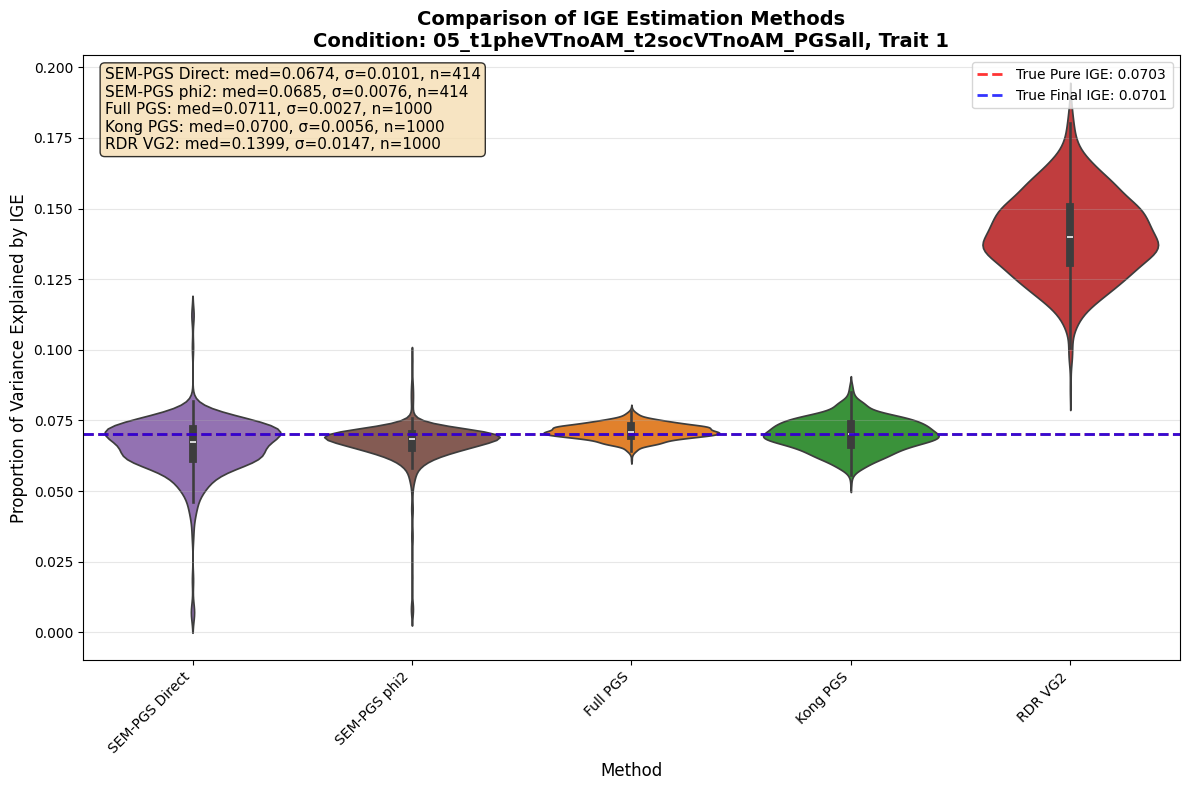

In [47]:
# Condition 5, Trait 1
condition = '05_t1pheVTnoAM_t2socVTnoAM_PGSall'
trait = 1

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None, 
                      true_values_pure=true_values_pure_ige, 
                      true_values_final=true_values_final_ige)
else:
    print("No data available for plotting")

=== Condition 5: T1 Pheno VT + T2 Social VT - Trait 2 ===
SEM-PGS: Loaded 422 rows with 97 columns from individual file
SEM-PGS: Filtered out 8 extreme outliers (>5 SD from mean) in phi11, phi22, phi2_11, phi2_22
SEM-PGS: Remaining 414 rows after outlier removal
Looking for columns: incremental_r2_PGSm2, incremental_r2_PGSp2
Available columns: ['filename', 'run_number', 'total_r2_PGSo2', 'total_r2_PGSp2', 'total_r2_PGSm2', 'incremental_r2_PGSo2', 'incremental_r2_PGSp2', 'incremental_r2_PGSm2', 'added_predictor_PGSo2', 'added_predictor_PGSp2', 'added_predictor_PGSm2', 'outcome_PGSo2', 'outcome_PGSp2', 'outcome_PGSm2', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 5: T1 Pheno VT + T2 Social VT - Trait 2:
  SEM-PGS Direct: n=414, median=0.0013, std=0.0117
  SEM-PGS phi2: n=414, median=0.0013, std=0.0099
  Full PGS: n=1000, median=0.0001, std=0.0001
  Kong PGS: n=1000, median=0.0002, std=0.0003
  RDR VG2: n=1000, median=0.0007, std=0.0087


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:332: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  true_key = '08_t1noVTgenAM'


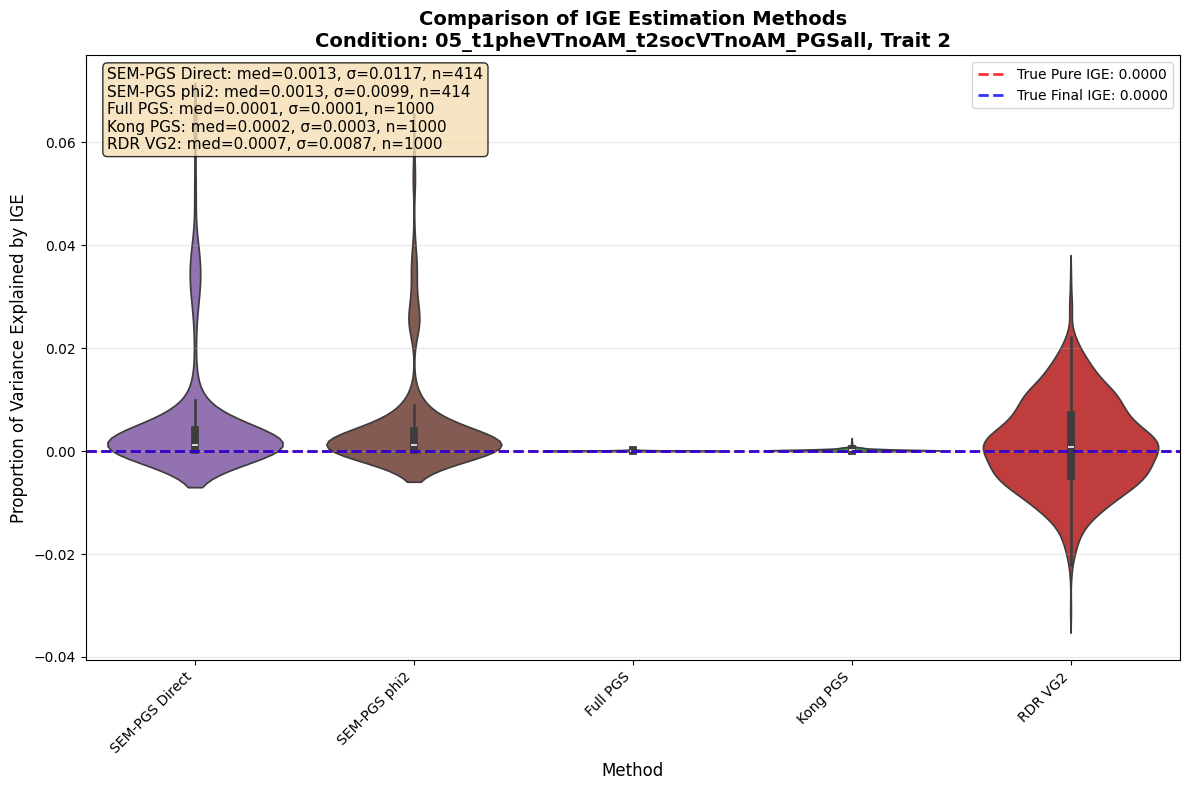

In [48]:
# Condition 5, Trait 2
condition = '05_t1pheVTnoAM_t2socVTnoAM_PGSall'
trait = 2

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None, 
                      true_values_pure=true_values_pure_ige, 
                      true_values_final=true_values_final_ige)
else:
    print("No data available for plotting")

## Condition 6: T1 Phenotypic AM Only (PGS All)

=== Condition 6: T1 Pheno AM only + T2 phe VT + phe AM - Trait 1 ===
SEM-PGS: Loaded 347 rows with 97 columns from individual file
SEM-PGS: Filtered out 7 extreme outliers (>5 SD from mean) in phi11, phi22, phi2_11, phi2_22
SEM-PGS: Remaining 340 rows after outlier removal
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 6: T1 Pheno AM only + T2 phe VT + phe AM - Trait 1:
  SEM-PGS Direct: n=340, median=0.0002, std=0.0011
  SEM-PGS phi2: n=340, median=0.0002, std=0.0019
  Full PGS: n=1000, median=0.0000, std=0.0000
  Kong PGS: n=1000, median=0.0522, std=0.0053
  RDR VG2: n=1000, median=0.1342, std=

/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:332: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  true_key = '08_t1noVTgenAM'


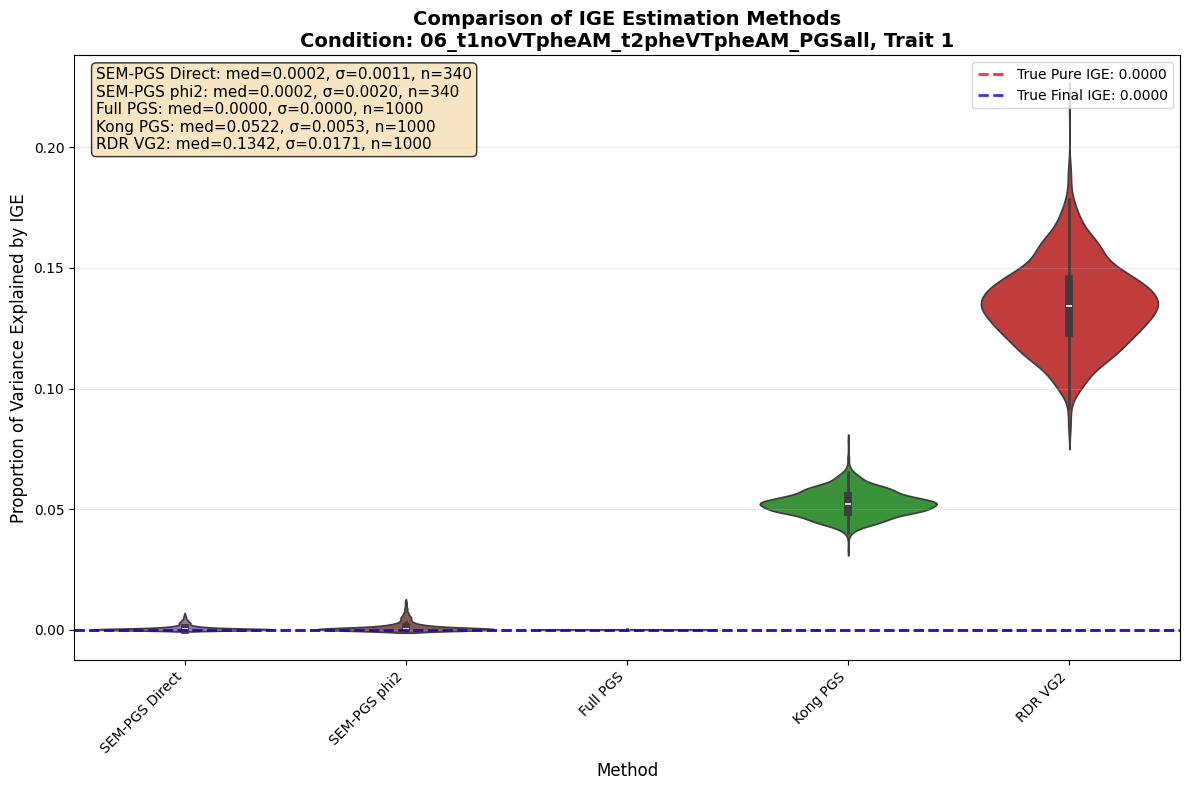

In [49]:
# Condition 6, Trait 1
condition = '06_t1noVTpheAM_t2pheVTpheAM_PGSall'
trait = 1

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None, 
                      true_values_pure=true_values_pure_ige, 
                      true_values_final=true_values_final_ige)
else:
    print("No data available for plotting")

=== Condition 6: T1 Pheno AM only + T2 phe VT + phe AM - Trait 2 ===
SEM-PGS: Loaded 347 rows with 97 columns from individual file
SEM-PGS: Filtered out 7 extreme outliers (>5 SD from mean) in phi11, phi22, phi2_11, phi2_22
SEM-PGS: Remaining 340 rows after outlier removal
Looking for columns: incremental_r2_PGSm2, incremental_r2_PGSp2
Available columns: ['filename', 'run_number', 'total_r2_PGSo2', 'total_r2_PGSp2', 'total_r2_PGSm2', 'incremental_r2_PGSo2', 'incremental_r2_PGSp2', 'incremental_r2_PGSm2', 'added_predictor_PGSo2', 'added_predictor_PGSp2', 'added_predictor_PGSm2', 'outcome_PGSo2', 'outcome_PGSp2', 'outcome_PGSm2', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 6: T1 Pheno AM only + T2 phe VT + phe AM - Trait 2:
  SEM-PGS Direct: n=340, median=0.0407, std=0.0052
  SEM-PGS phi2: n=340, median=0.0622, std=0.0039
  Full PGS: n=1000, median=0.0760, std=0.0024
  Kong PGS: n=1000, median=0.2423, std=0.0085
  RDR VG2: n=1000, median=0.6348, std=

/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:332: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  true_key = '08_t1noVTgenAM'


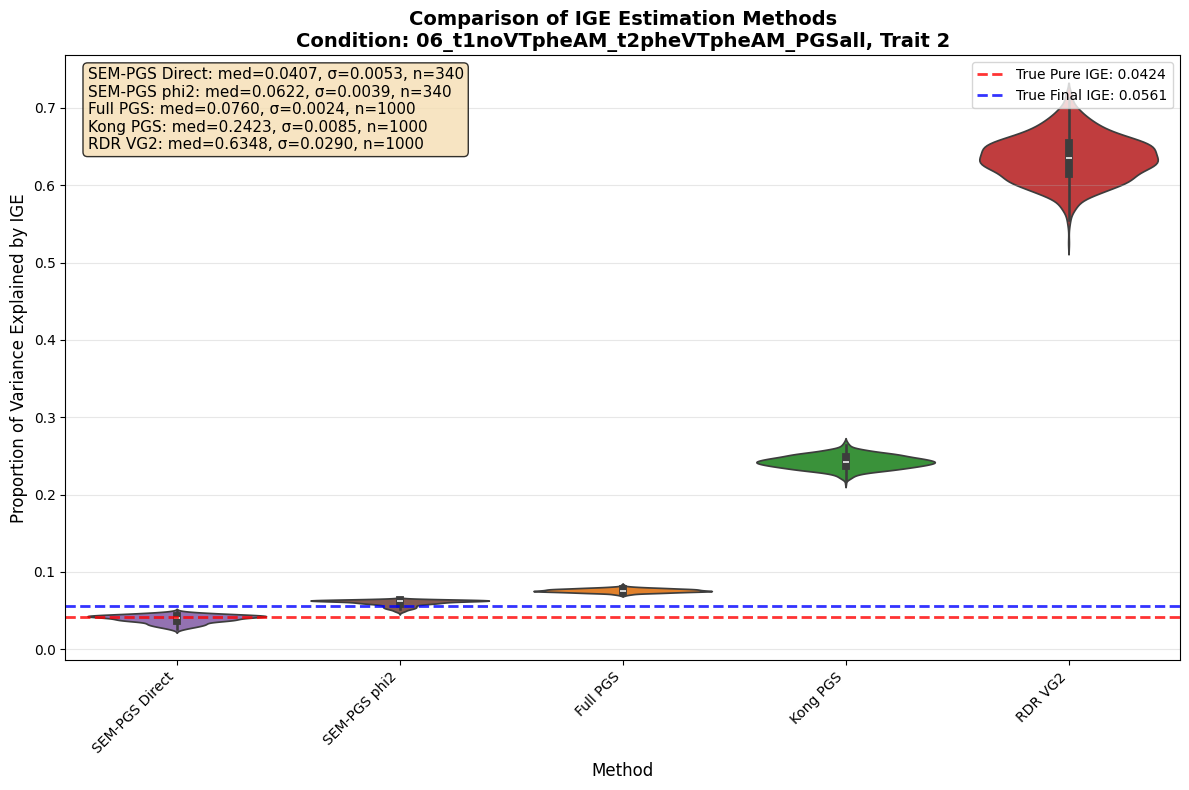

In [50]:
# Condition 6, Trait 2
condition = '06_t1noVTpheAM_t2pheVTpheAM_PGSall'
trait = 2

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None, 
                      true_values_pure=true_values_pure_ige, 
                      true_values_final=true_values_final_ige)
else:
    print("No data available for plotting")

## Condition 7: T1 Social AM Only (PGS All)

=== Condition 7: T1 Social AM only + T2 phe VT + soc AM - Trait 1 ===
SEM-PGS: Loaded 475 rows with 97 columns from individual file
SEM-PGS: Filtered out 14 extreme outliers (>5 SD from mean) in phi11, phi22, phi2_11, phi2_22
SEM-PGS: Remaining 461 rows after outlier removal
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 7: T1 Social AM only + T2 phe VT + soc AM - Trait 1:
  SEM-PGS Direct: n=461, median=0.0001, std=0.0003
  SEM-PGS phi2: n=461, median=0.0001, std=0.0004
  Full PGS: n=999, median=0.0000, std=0.0000
  Kong PGS: n=999, median=0.0002, std=0.0002
  RDR VG2: n=1000, median=-0.0001, st

/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:332: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  true_key = '08_t1noVTgenAM'


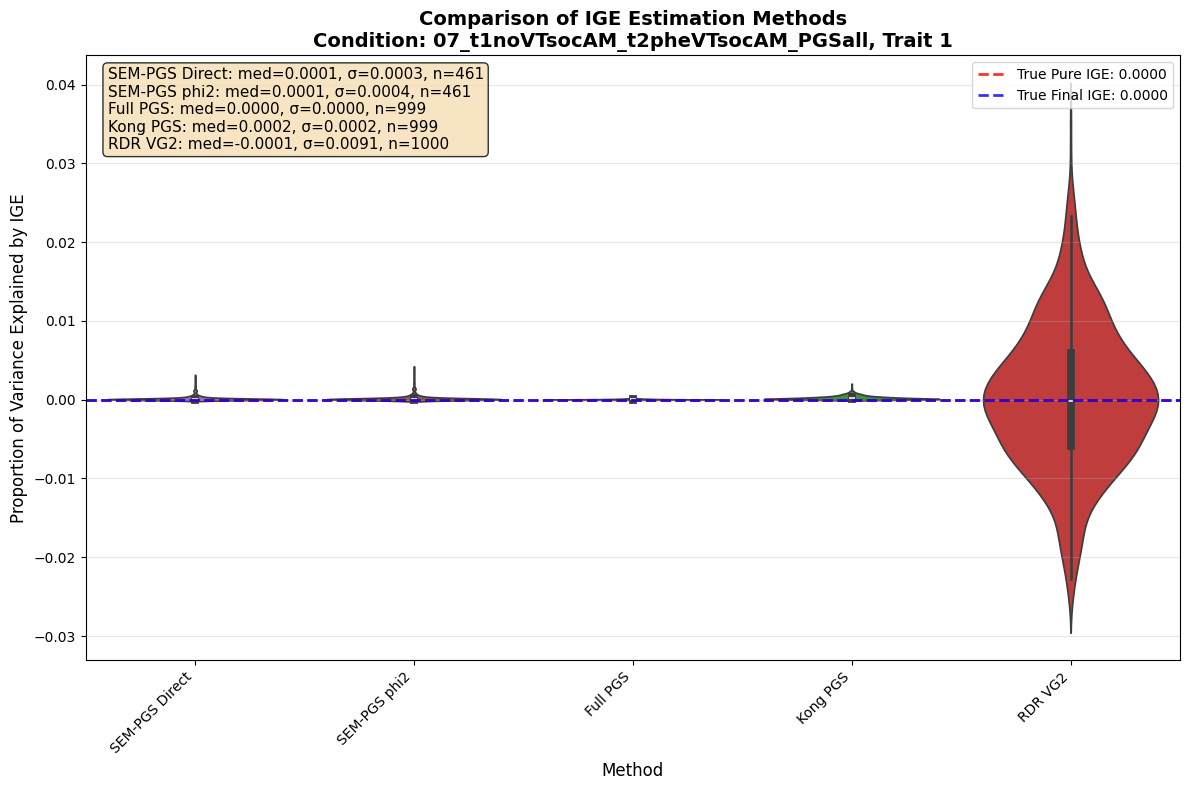

In [51]:
# Condition 7, Trait 1
condition = '07_t1noVTsocAM_t2pheVTsocAM_PGSall'
trait = 1

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None, 
                      true_values_pure=true_values_pure_ige, 
                      true_values_final=true_values_final_ige)
else:
    print("No data available for plotting")

=== Condition 7: T1 Social AM only + T2 phe VT + soc AM - Trait 2 ===
SEM-PGS: Loaded 475 rows with 97 columns from individual file
SEM-PGS: Filtered out 14 extreme outliers (>5 SD from mean) in phi11, phi22, phi2_11, phi2_22
SEM-PGS: Remaining 461 rows after outlier removal
Looking for columns: incremental_r2_PGSm2, incremental_r2_PGSp2
Available columns: ['filename', 'run_number', 'total_r2_PGSo2', 'total_r2_PGSp2', 'total_r2_PGSm2', 'incremental_r2_PGSo2', 'incremental_r2_PGSp2', 'incremental_r2_PGSm2', 'added_predictor_PGSo2', 'added_predictor_PGSp2', 'added_predictor_PGSm2', 'outcome_PGSo2', 'outcome_PGSp2', 'outcome_PGSm2', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 7: T1 Social AM only + T2 phe VT + soc AM - Trait 2:
  SEM-PGS Direct: n=461, median=0.0525, std=0.0038
  SEM-PGS phi2: n=461, median=0.0661, std=0.0014
  Full PGS: n=999, median=0.0807, std=0.0027
  Kong PGS: n=999, median=0.1363, std=0.0082
  RDR VG2: n=1000, median=0.3048, std

/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:332: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  true_key = '08_t1noVTgenAM'


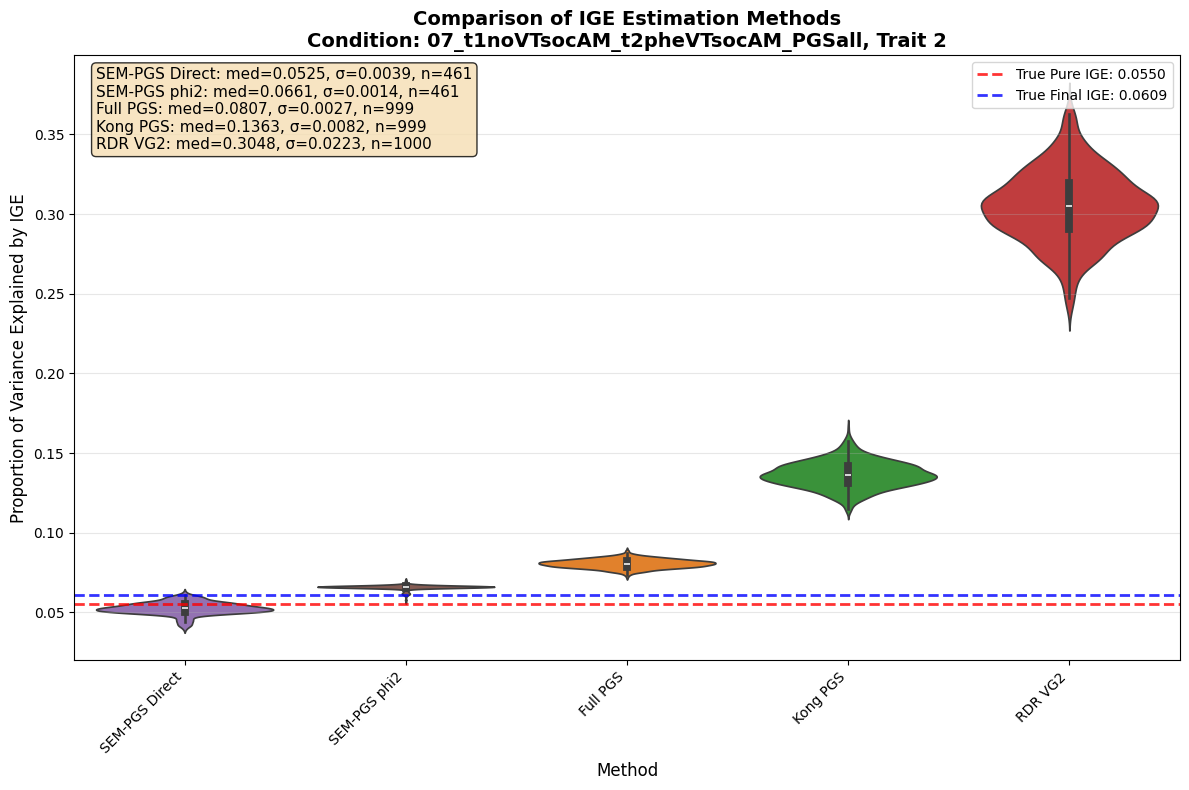

In [52]:
# Condition 7, Trait 2
condition = '07_t1noVTsocAM_t2pheVTsocAM_PGSall'
trait = 2

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None, 
                      true_values_pure=true_values_pure_ige, 
                      true_values_final=true_values_final_ige)
else:
    print("No data available for plotting")

## Condition 8: T1 Genetic AM Only (PGS All)

=== Condition 8: T1 Genetic AM only + T2 phe VT + gen AM - Trait 1 ===
SEM-PGS: Loaded 511 rows with 97 columns from individual file
SEM-PGS: Filtered out 7 extreme outliers (>5 SD from mean) in phi11, phi22, phi2_11, phi2_22
SEM-PGS: Remaining 504 rows after outlier removal
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 8: T1 Genetic AM only + T2 phe VT + gen AM - Trait 1:
  SEM-PGS Direct: n=504, median=0.0004, std=0.0021
  SEM-PGS phi2: n=504, median=0.0006, std=0.0031
  Full PGS: n=1000, median=0.0000, std=0.0000
  Kong PGS: n=1000, median=0.0252, std=0.0034
  RDR VG2: n=1000, median=0.1184, 

/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:332: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  true_key = '08_t1noVTgenAM'


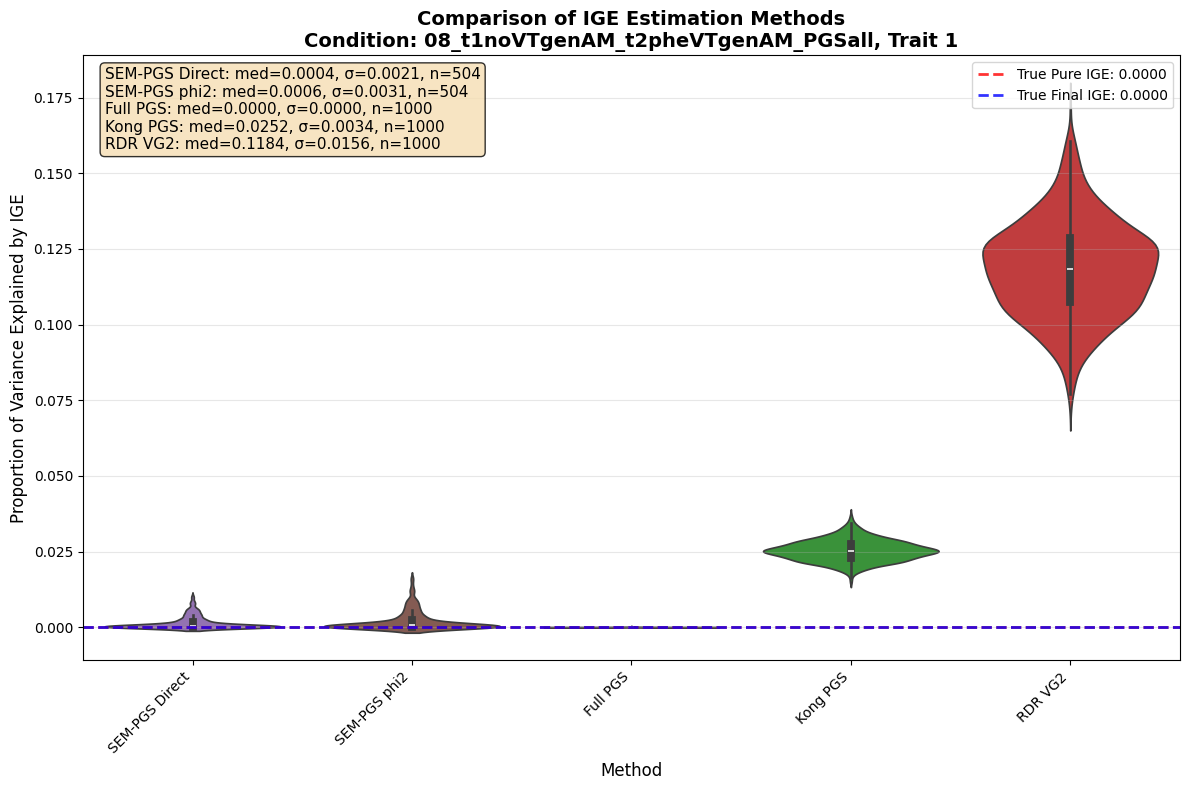

In [53]:
# Condition 8, Trait 1
condition = '08_t1noVTgenAM_t2pheVTgenAM_PGSall'
trait = 1

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None, 
                      true_values_pure=true_values_pure_ige, 
                      true_values_final=true_values_final_ige)
else:
    print("No data available for plotting")

=== Condition 8: T1 Genetic AM only + T2 phe VT + gen AM - Trait 2 ===
SEM-PGS: Loaded 511 rows with 97 columns from individual file
SEM-PGS: Filtered out 7 extreme outliers (>5 SD from mean) in phi11, phi22, phi2_11, phi2_22
SEM-PGS: Remaining 504 rows after outlier removal
Looking for columns: incremental_r2_PGSm2, incremental_r2_PGSp2
Available columns: ['filename', 'run_number', 'total_r2_PGSo2', 'total_r2_PGSp2', 'total_r2_PGSm2', 'incremental_r2_PGSo2', 'incremental_r2_PGSp2', 'incremental_r2_PGSm2', 'added_predictor_PGSo2', 'added_predictor_PGSp2', 'added_predictor_PGSm2', 'outcome_PGSo2', 'outcome_PGSp2', 'outcome_PGSm2', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 8: T1 Genetic AM only + T2 phe VT + gen AM - Trait 2:
  SEM-PGS Direct: n=504, median=0.0468, std=0.0077
  SEM-PGS phi2: n=504, median=0.0625, std=0.0052
  Full PGS: n=1000, median=0.0732, std=0.0025
  Kong PGS: n=1000, median=0.1797, std=0.0078
  RDR VG2: n=1000, median=0.5415, 

/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:332: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  true_key = '08_t1noVTgenAM'


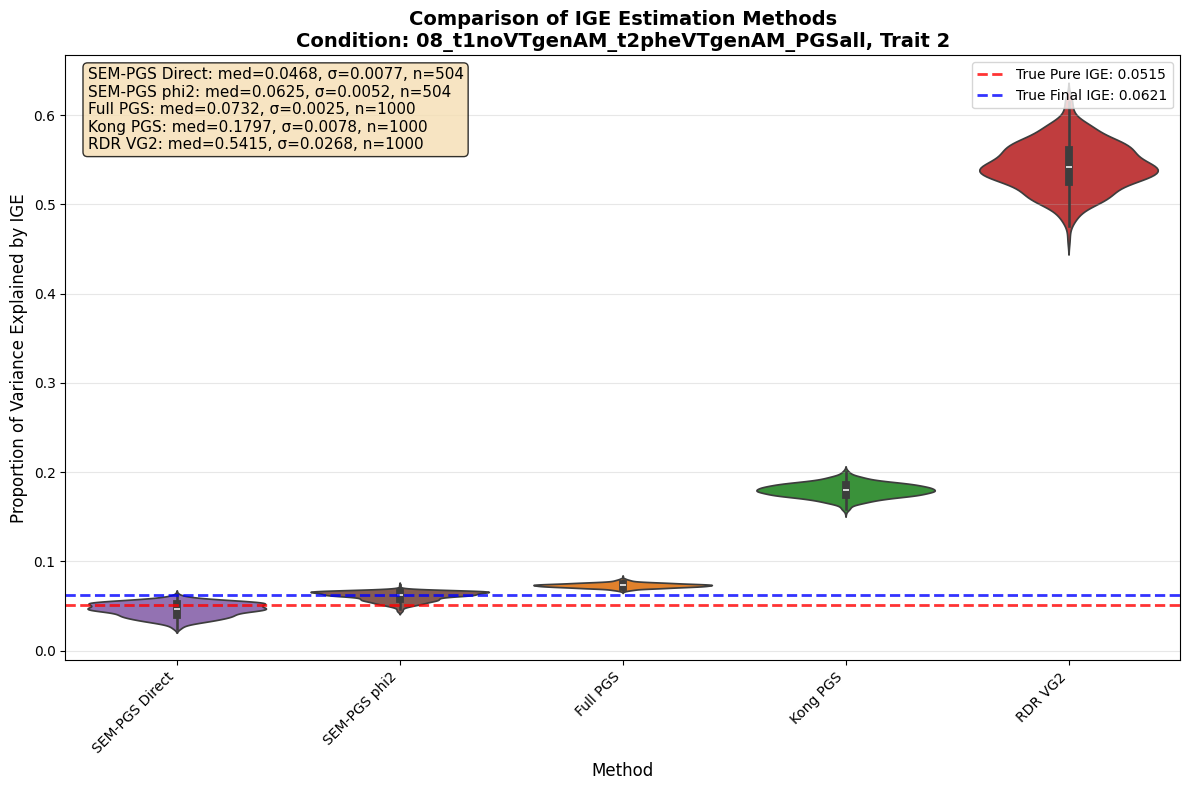

In [54]:
# Condition 8, Trait 2
condition = '08_t1noVTgenAM_t2pheVTgenAM_PGSall'
trait = 2

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None, 
                      true_values_pure=true_values_pure_ige, 
                      true_values_final=true_values_final_ige)
else:
    print("No data available for plotting")

## Summary and Interpretation

The updated analysis now focuses on five key IGE estimation methods in the specified order:

### Method Details:
1. **SEM-PGS Direct**: Direct genetic nurture effects (phi) only, no latent effects
2. **SEM-PGS phi2**: Extended genetic nurture effects (phi2) including additional correlation terms
3. **Full PGS**: Incremental R² from adding parental PGS to offspring PGS  
4. **Kong PGS**: R² from non-transmitted alleles (haplotypic approach)
5. **RDR VG2**: Second parameter from relatedness disequilibrium regression

### Statistical Reporting:
- **Median** values instead of means (more robust to outliers)
- Standard deviations for variability assessment
- Sample sizes for each method

### True Value References:
- **Red dashed lines**: Pure IGE proportions (theoretical values from simulation parameters)
- **Blue dashed lines**: Final IGE proportions (accounting for all genetic effects)

### Interpretation Notes:
- Different conditions represent various combinations of vertical transmission and assortative mating
- Trait-specific patterns may emerge due to different simulation parameters
- Method comparisons reveal strengths and limitations of each IGE estimation approach
- The five methods represent different statistical approaches to capturing indirect genetic effects
- SEM-PGS phi2 includes additional correlation terms compared to the direct method

Example 4: Comparing only selected methods
--------------------------------------------------
Looking for columns: incremental_r2_PGSm2, incremental_r2_PGSp2
Available columns: ['filename', 'run_number', 'total_r2_PGSo2', 'total_r2_PGSp2', 'total_r2_PGSm2', 'incremental_r2_PGSo2', 'incremental_r2_PGSp2', 'incremental_r2_PGSm2', 'added_predictor_PGSo2', 'added_predictor_PGSp2', 'added_predictor_PGSm2', 'outcome_PGSo2', 'outcome_PGSp2', 'outcome_PGSm2', 'n_samples', 'n_predictors', 'outcome', 'regression_type']
Full PGS: 1000 obs, median = 0.0760
RDR VG2: 1000 obs, median = 0.6348


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:332: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  true_key = '08_t1noVTgenAM'
/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:332: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  true_key = '08_t1noVTgenAM'


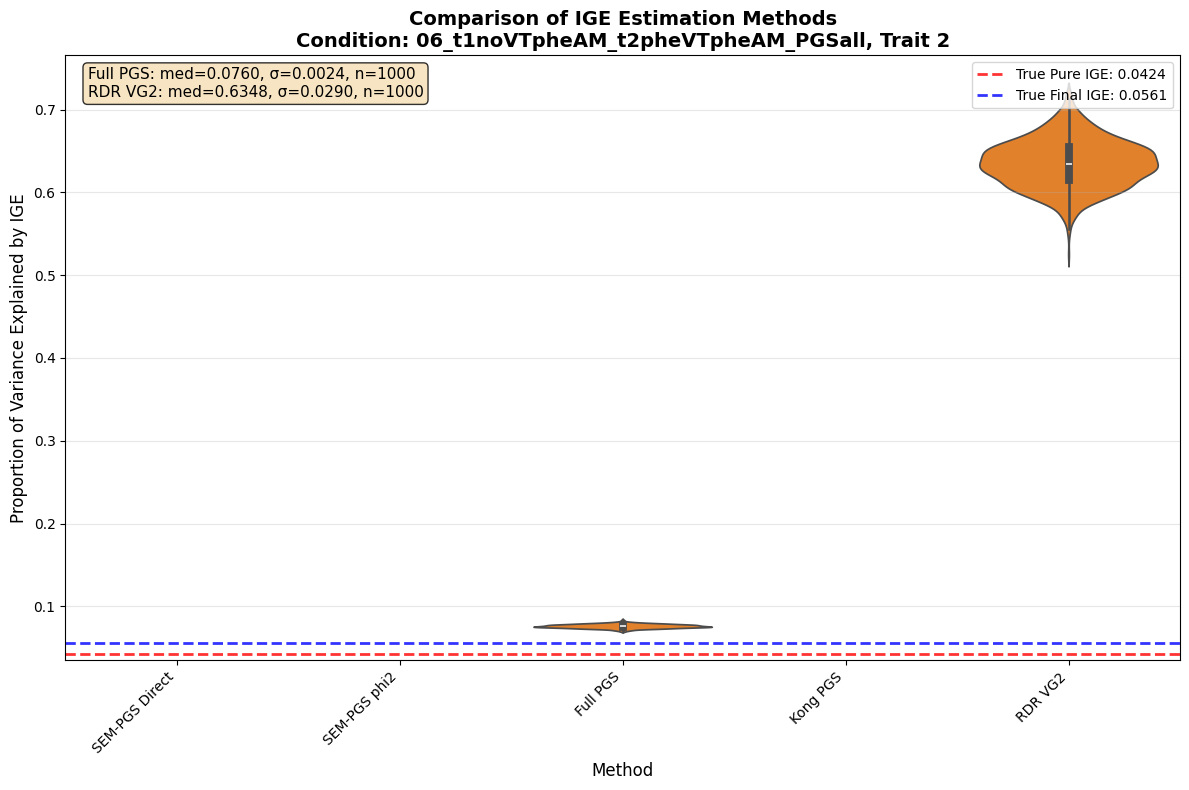

In [55]:
# Example 4: Compare specific methods only
print("Example 4: Comparing only selected methods")
print("-" * 50)

condition = '06_t1noVTpheAM_t2pheVTpheAM_PGSall'
trait = 2

# Load only specific methods
rdr_data = load_rdr_data(condition)
rdr_ige = calculate_rdr_ige_proportions(rdr_data, trait) if rdr_data is not None else None

fullpgs_data = load_pgs_regression_data(condition, trait, 'full_pgs')
fullpgs_ige = calculate_fullpgs_ige_proportions(fullpgs_data, trait) if fullpgs_data is not None else None

# Create comparison with only two methods
limited_data_dict = {}
if fullpgs_ige is not None:
    limited_data_dict['Full PGS'] = fullpgs_ige  
    print(f"Full PGS: {len(fullpgs_ige)} obs, median = {np.median(fullpgs_ige):.4f}")

if rdr_ige is not None:
    limited_data_dict['RDR VG2'] = rdr_ige
    print(f"RDR VG2: {len(rdr_ige)} obs, median = {np.median(rdr_ige):.4f}")

if limited_data_dict:
    create_violin_plot(limited_data_dict, condition, trait, save_path=None, 
                      true_values_pure=true_values_pure_ige, 
                      true_values_final=true_values_final_ige)

In [56]:
# Example 5: Summary statistics across all four methods
print("\nExample 5: Cross-method summary statistics")
print("-" * 50)

def get_cross_method_summary(conditions, traits):
    """Generate summary statistics across multiple conditions and traits."""
    
    summary_data = []
    
    for condition in conditions:
        for trait in traits:
            results, _ = analyze_ige_updated(condition, trait, verbose=False)
            
            for method, stats in results.items():
                summary_data.append({
                    'condition': condition,
                    'trait': trait,
                    'method': method,
                    'n_obs': stats['n'],
                    'median_ige': stats['median'],
                    'std_ige': stats['std']
                })
    
    return pd.DataFrame(summary_data)

# Generate cross-method summary
summary_df = get_cross_method_summary(
    conditions=['05_t1pheVTnoAM_t2socVTnoAM_PGSall', '06_t1noVTpheAM_t2pheVTpheAM_PGSall'],
    traits=[1, 2]
)

print(f"Generated summary with {len(summary_df)} method-condition-trait combinations")
print("\nFirst few rows:")
print(summary_df.head(10))

# Method comparison across conditions
if len(summary_df) > 0:
    print(f"\nMedian IGE estimates by method:")
    method_medians = summary_df.groupby('method')['median_ige'].agg(['count', 'mean', 'std']).round(4)
    print(method_medians)


Example 5: Cross-method summary statistics
--------------------------------------------------
SEM-PGS: Loaded 422 rows with 97 columns from individual file
SEM-PGS: Filtered out 8 extreme outliers (>5 SD from mean) in phi11, phi22, phi2_11, phi2_22
SEM-PGS: Remaining 414 rows after outlier removal
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']
SEM-PGS: Loaded 422 rows with 97 columns from individual file
SEM-PGS: Filtered out 8 extreme outliers (>5 SD from mean) in phi11, phi22, phi2_11, phi2_22
SEM-PGS: Remaining 414 rows after outlier removal
Looking for columns: incremental_r2_PGSm2, incremental_r2_PGSp2
Available 